[Machine Learning with TensorFlow](https://www.manning.com/books/machine-learning-with-tensorflow)

Author: Nishant Shukla

Chapter 3 - Linear regression and beyond

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Solving linear regression

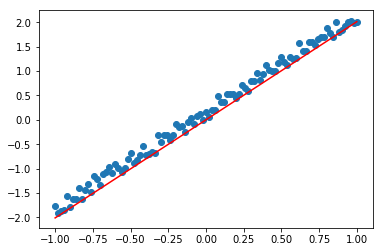

In [6]:
learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.rand(*x_train.shape) * 0.33

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    return tf.multiply(X, w)

w = tf.Variable(0.0, name="weights")

y_model = model(X, w)
cost = tf.square(Y-y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(training_epochs):
        for x, y in zip(x_train, y_train):
            sess.run(train_op, feed_dict={X: x, Y: y})
    w_val = sess.run(w)
    
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

# Polynomial Model

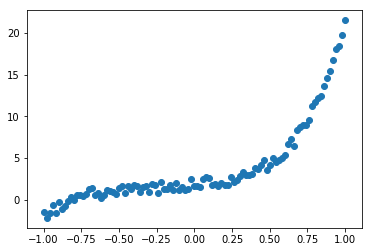

In [7]:
learning_rate = 0.01
training_epochs = 40

trX = np.linspace(-1, 1, 101)
num_coeffs = 6
trY_coeffs = [1,2,3,4,5,6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
    
trY += np.random.rand(*trX.shape) * 1.5

plt.scatter(trX, trY)
plt.show()

[ 1.58778572  1.88753176  4.20362186  4.8080554   3.71818447  4.94725704]


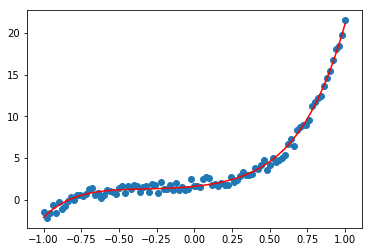

In [10]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

cost = tf.pow(Y-y_model, 2)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(training_epochs):
        for x, y in zip(trX, trY):
            sess.run(train_op, feed_dict={X: x, Y: y})
    w_val = sess.run(w)
    print(w_val)

plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()